Merci de **ne pas modifier** le nom de ce notebook (même pour y inclure son nom).

Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes ci-dessous par vos réponses: 
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 


---

# FFT : exemple pas à pas

Dans cet exemple on explore ce qui sort des fonctions de la librairies `numpy.fft`.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

On va travailler avec un signal carré $f(t)$ de tension électrique ($f$ est en Volts, $t$ a la dimension d'un temps), dont on sait que la transformée de Fourier est un sinus cardinal $\hat{f}(\nu)$.

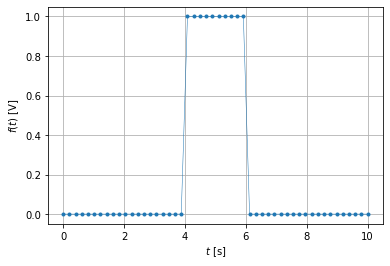

In [2]:
#defini la gamme des t couverte
N = 50
t = np.linspace(0, 10, N)
f_t = np.zeros_like(t)

#met des 1 sur la gamme centrale
id_range_mid = np.where( (t>2*t[-1]/5) & (t<3*t[-1]/5) )
f_t[id_range_mid] = 1

plt.plot(t,f_t, linewidth=0.5, marker = ".")
plt.ylabel("$f(t)$ [V]")
plt.xlabel("$t$ [s]")
plt.grid()
plt.show()

Calculons d'abord la FFT de $s(t)$, sans autre opération:

In [3]:
#calcule la FFT
tf_nu = np.fft.fft(f_t)
print("Premier éléments de tf_nu:", tf_nu[:5])
print("Taille du tableau:", len(tf_nu))

Premier éléments de tf_nu: [10.        +0.j         -9.34257905-0.58778525j  7.52838752+0.95105652j
 -4.98561285-0.95105652j  2.28927241+0.58778525j]
Taille du tableau: 50


La TF est une opération qui renvoie une fonction $\hat{f}(\nu)$ complexe par nature:
$$\hat f(\nu) = \int_{-\infty}^{+\infty} f(x)  \exp(-2i\pi\nu t)dt$$
Pour la représenter, on peut en prendre le module par exemple, ou le module carré ce qui revient à calculer son spectre de puissance. L'unité du spectre de puissance est en [f]$^2$/Hz.

In [4]:
psd = np.abs(tf_nu)**2

Représentons le tableau du spectre de puissance en fonction des indices du tableau:

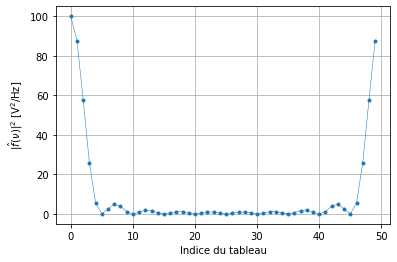

In [5]:
#plot : psd
fig = plt.figure()
plt.plot(psd, linewidth=0.5, marker = ".")
plt.xlabel(r"Indice du tableau")
plt.ylabel(r"$|\hat f(\nu)|^2$ [V$^2$/Hz]")
plt.grid()
plt.show()

On a deux soucis:
1. la FFT n'est pas représentée en fonction de la fréquence $\nu$;
1. on n'a pas exactement un sinus cardinal, mais un sinus cardinal "éclaté".

Le premier point vient du fait que `np.fft.fft` ne renvoie que le tableau de $\hat{f}(\nu)$ mais pas le tableau des fréquences $\nu$ correspondantes pour lesquelles la TF a été estimée. Pour le créer, on donne à `np.fft.fftfreq` la taille $N$ du tableau désiré et le pas de temps $\delta t$. Pour un signal de durée $T_0 = N\delta t$, le résultat est un tableau de taille $N$ de 
$$\left\lbrace\frac{k}{T_0}, k \in\left[ -N/2,N/2\right[\right\rbrace$$
L'unité est naturellement en 1/[T_0].

Tableau des fréquences:
 [ 0.     0.098  0.196  0.294  0.392  0.49   0.588  0.686  0.784  0.882
  0.98   1.078  1.176  1.274  1.372  1.47   1.568  1.666  1.764  1.862
  1.96   2.058  2.156  2.254  2.352 -2.45  -2.352 -2.254 -2.156 -2.058
 -1.96  -1.862 -1.764 -1.666 -1.568 -1.47  -1.372 -1.274 -1.176 -1.078
 -0.98  -0.882 -0.784 -0.686 -0.588 -0.49  -0.392 -0.294 -0.196 -0.098]

Plus petite fréquence: -2.45 Calcul avec la formule: -2.45


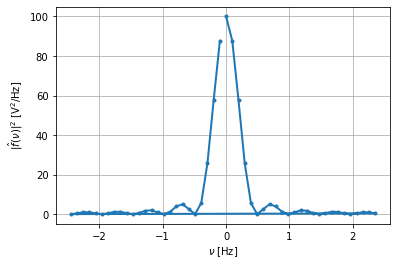

In [6]:
nu = np.fft.fftfreq(t.size, d=t[1]-t[0])
print("Tableau des fréquences:\n", nu)
print("\nPlus petite fréquence:",np.min(nu),
      "Calcul avec la formule:", -(t.size/2) / (t.size * (t[1]-t[0])))

#plot :  espace de Fourier
fig = plt.figure()
plt.plot(nu, psd, linewidth=2, marker = ".")
plt.xlabel(r"$\nu$ [Hz]")
plt.ylabel(r"$|\hat f(\nu)|^2$ [V$^2$/Hz]")
plt.grid()
plt.show()

On remarque que le tableau des fréquences n'est pas ordonné dans le sens croissant, ce qui donne des lignes étranges dans le graphique, et nous emmène au deuxième soucis.

Pour des raisons d'optimisation, le résultat de `np.fft.fft` ET de `np.fft.fftfreq` est ordonné selon $k = \left\lbrace 0, ..., N/2-1, -N/2, ..., -1\right\rbrace$. Cet ordre est tout à fait compris par la machine, mais pose un problème lorsque l'on souhaite représenter la FFT à l'écran et l'interpréter. Pour réordonner les fréquences et le tableau de FFT dans l'ordre des fréquences croissantes, on utilise la fonction `np.fft.fftshift`:

In [7]:
#reordonne
psd = np.fft.fftshift(psd)
nu = np.fft.fftshift(nu)
print("Tableau des fréquences:\n", nu)

Tableau des fréquences:
 [-2.45  -2.352 -2.254 -2.156 -2.058 -1.96  -1.862 -1.764 -1.666 -1.568
 -1.47  -1.372 -1.274 -1.176 -1.078 -0.98  -0.882 -0.784 -0.686 -0.588
 -0.49  -0.392 -0.294 -0.196 -0.098  0.     0.098  0.196  0.294  0.392
  0.49   0.588  0.686  0.784  0.882  0.98   1.078  1.176  1.274  1.372
  1.47   1.568  1.666  1.764  1.862  1.96   2.058  2.156  2.254  2.352]


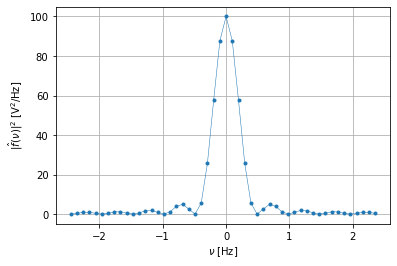

In [8]:
#plot :  espace de Fourier
fig = plt.figure()
plt.plot(nu, psd, linewidth=0.5, marker = ".")
plt.xlabel(r"$\nu$ [Hz]")
plt.ylabel(r"$|\hat f(\nu)|^2$ [V$^2$/Hz]")
plt.grid()
plt.show()

La représentation de $|\hat f(\nu)|^2$ est ainsi un sinus cardinal carré comme attendu.

Quelques remarques sur l'échantillonnage:
- on rappelle que plus $T_0$ est important plus la résolution en fréquence $\delta \nu = 1/T_0$ est importante...
- mais à nombre d'échantillons $N$ fixé la fréquence maximale atteignable $\delta \nu N / 2$ diminue...
- **à nombre $N$ fixé, il y a donc toujours un compromis à faire entre résolution en fréquence et plage de fréquences mesurables !**
- de manière général, plus $N$ est grand, mieux c'est pour une analyse de Fourier, mais cela augmente le temps de calcul.

Quelques remarques conclusives:
- on remarque que la fréquence maximale renvoyer par la FFT `np.fft.fft` n'est pas $1/\delta t$ mais $1/(2 \delta t)$ en vertu du théorème d'échantillonnage;
- si le signal $s(t)$ est à valeurs réels, alors $\hat f(\nu)^* = \hat f(-\nu) $ donc il n'est pas utile de calculer les $N$ éléments du tableau de FFT mais seulement les $N/2+1$ des fréquences positives et nulle: pour des calculs lourds le gain de temps est donc un facteur 2, et pour cela il faut utiliser `np.fft.rfft`:

Tableau des fréquences:
 [0.    0.098 0.196 0.294 0.392 0.49  0.588 0.686 0.784 0.882 0.98  1.078
 1.176 1.274 1.372 1.47  1.568 1.666 1.764 1.862 1.96  2.058 2.156 2.254
 2.352 2.45 ]

Taille du tableau: 26


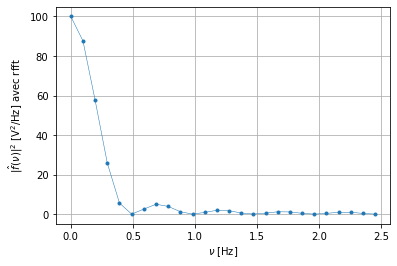

In [9]:
psd_r = np.abs(np.fft.rfft(f_t))**2
nu_r = np.fft.rfftfreq(t.size, d=t[1]-t[0])
print("Tableau des fréquences:\n", nu_r)
print("\nTaille du tableau:", len(psd_r))

#plot :  espace de Fourier
fig = plt.figure()
plt.plot(nu_r, psd_r, linewidth=0.5, marker = ".")
plt.xlabel(r"$\nu$ [Hz]")
plt.ylabel(r"$|\hat f(\nu)|^2$ [V$^2$/Hz] avec rfft")
plt.grid()
plt.show()